# Example of G3tHWP

G3tHWP gives HWP angle solution from SO HK g3 file.

In [41]:
from g3thwp import G3tHWP
import so3g
import sotodlib.io.load_smurf as load_smurf
import numpy as np
import matplotlib.pyplot as plt

## Load data with time range

In [24]:
start, end = 1643342329, 1643342929 # 2Hz rotation
#start, end = 1643340368.424739, 1643340969.269591 #spinup data
archive_path = '/mnt/SOdata/pton-tsat/hk/' # path to HK data archive
hwp = G3tHWP()
data = hwp.load_data(start, end, archive_path)
solved = hwp.analyze(data)
#hwp.write_solution(solved,'output.g3')

In [92]:
import g3thwp
import importlib
importlib.reload(g3thwp)
from g3thwp import G3tHWP
hwp = G3tHWP()
hwp.write_solution(solved,'output.g3')

## Load data with g3 file name

In [25]:
#hwp = G3tHWP()
#path = '/mnt/SOdata/pton-tsat/hk/16433' # path to files
#file = ['1643340100.g3','1643343706.g3'] # array of finename
#load_data = hwp.load_file(path, file)
#solved = hwp.analyze(load_data)
#hwp.write_solution(solved,'outout.g3')

## Plot hwp speed & angle

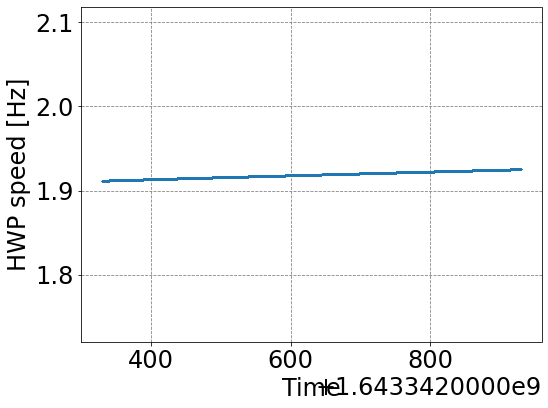

In [26]:
plt.figure(figsize=(8,6))
plt.xlabel('Time')
plt.ylabel('HWP speed [Hz]')
idx = np.where(solved['locked'])
plt.plot(solved['slow_time'][idx],solved['hwp_rate'][idx],'.', markersize=0.1)
plt.ylim(solved['hwp_rate'][idx].min()*0.9,solved['hwp_rate'][idx].max()*1.1)
plt.show()

In [27]:
print(solved)

{'fast_time': array([1.64334233e+09, 1.64334233e+09, 1.64334233e+09, ...,
       1.64334293e+09, 1.64334293e+09, 1.64334293e+09]), 'angle': array([0.65587636, 0.66138793, 0.66689949, ..., 1.67551608, 1.68102765,
       1.68653921]), 'slow_time': array([1.64334233e+09, 1.64334233e+09, 1.64334233e+09, ...,
       1.64334293e+09, 1.64334293e+09, 1.64334293e+09]), 'stable': array([ True,  True,  True, ...,  True,  True,  True]), 'locked': array([False, False, False, ..., False, False, False]), 'hwp_rate': array([0., 0., 0., ..., 0., 0., 0.])}


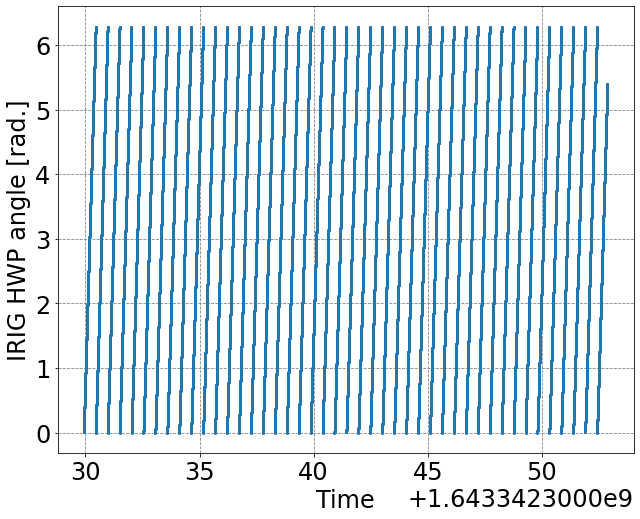

In [28]:
n = 50000
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('IRIG HWP angle [rad.]')
idx = np.where(solved['locked'])
plt.plot(solved['fast_time'][idx][:n], solved['angle'][idx][:n], '.',markersize=4)
plt.show()

## Laod output angle g3 file

In [113]:
scanner = so3g.hk.HKArchiveScanner()
filename = 'output.g3'
scanner.process_file(filename)
arc = scanner.finalize()
print(arc.get_data()[0].keys())

dict_keys(['hwp.hwp_rate', 'hwp.locked', 'hwp.stable', 'hwp.hwp_angle'])


In [115]:
fields = ['hwp.hwp_angle', 'hwp.locked', 'hwp.stable','hwp.hwp_rate']

In [116]:
utput_data = arc.simple(fields)
fast_time = output_data[0][0]
angle = output_data[0][1]
slow_time = output_data[1][0]
locked = output_data[1][1]
stable = output_data[2][1]
hwp_rate = output_data[3][1]

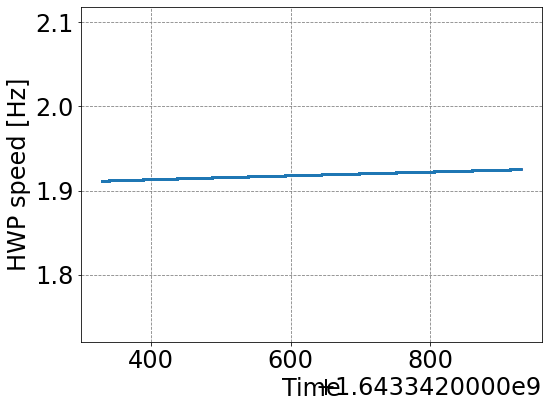

In [117]:
plt.figure(figsize=(8,6))
plt.xlabel('Time')
plt.ylabel('HWP speed [Hz]')
idx = np.where(solved['locked'])
plt.plot(slow_time[idx],hwp_rate[idx],'.',markersize=1)
plt.ylim(hwp_rate[idx].min()*0.9,hwp_rate[idx].max()*1.1)
plt.show()

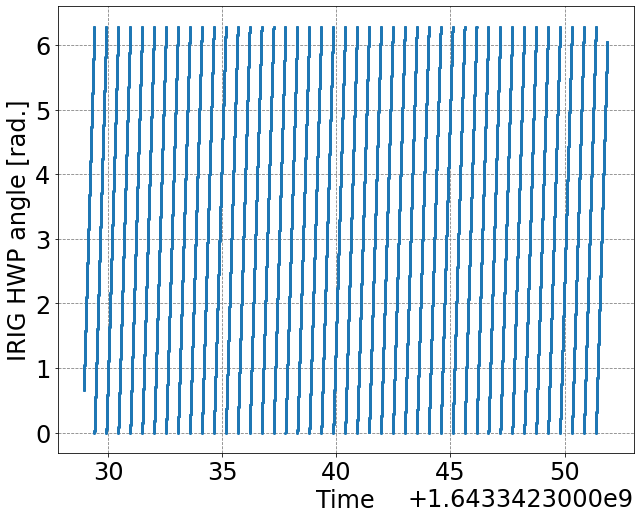

In [118]:
n = 50000
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('IRIG HWP angle [rad.]')
idx = np.where(solved['locked'])
plt.plot(output_data[0][0][:n],output_data[0][1][:n],'.',markersize=4)
plt.show()

# Example of linear interpolation between IRIG and SMuRF timing

**HWP spinning at around 2Hz** <br>
/pton-rd/timestreams/16433/crate1slot4/1643342329_000.g3 <br>
/pton-rd/timestreams/16433/crate1slot4/1643342329_001.g3

In [18]:
#archive_path = '/path/to/data/timestream/'
archive_path = '/mnt/SOdata/pton-rd/timestreams/16433/crate1slot4'
g3_data = load_smurf.load_file([   
    archive_path + '/1643342329_000.g3',
    archive_path + '/1643342329_001.g3',
])

100%|█████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.46s/it]


In [29]:
smurf_timestamp = g3_data.timestamps

In [30]:
import scipy
smurf_angle = scipy.interpolate.interp1d(solved['fast_time'], solved['angle'], kind='linear',fill_value='extrapolate')(smurf_timestamp)

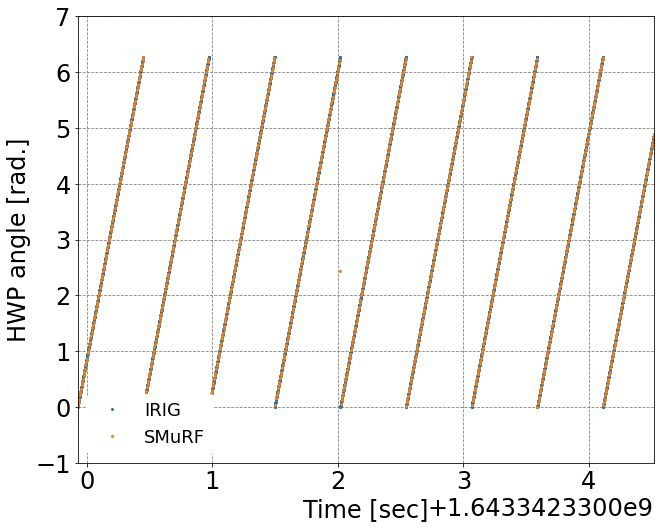

In [38]:
n = 10000
plt.figure(figsize=(10,8))
plt.xlabel('Time [sec]')
plt.ylabel('HWP angle [rad.]')
idx = np.where(solved['locked'])
plt.plot(solved['fast_time'][idx], solved['angle'][idx], '.',markersize=4, label='IRIG')
plt.plot(smurf_timestamp, smurf_angle, '.', markersize=4, label ='SMuRF')
plt.xlim(solved['fast_time'][idx][0],solved['fast_time'][idx][n])
plt.ylim(-1,7)
plt.legend()
plt.show()

In [ ]:
from sotodlib.io import hwp
hwp_raw_data = hwp.read_raw(start, end, instance_id='HBA1')
solved = hwp.HWPAnalysis(**hwp_params).analyze(hwp_raw_data)
hwp.write_solution(solved, 'output.g3')